# Sales analysis in Python

In this notebook we are going to perform basic feature engineering operations in order to gain meaningful insight into the sales data. We will also perform operations (aggregations, sumations, sorting, etc.) which are essential in the retail industry to understand customers' behaviour and maximise profit.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### Import all files from working directory

In [2]:
wr = "/Users/ramonsotogarcia/Desktop/Sales analysis Python/SalesAnalysis/Sales_Data/"

files = [file for file in os.listdir(wr)]

df = pd.DataFrame()

for file in files:
    new_df = pd.read_csv(wr + file, header = 0)
    df = pd.concat([df, new_df], axis = 0)
    
#let's have a look at the data

df.head(5)
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Task 1. Data cleaning: missing values, changing data types, creating variables, etc.

- Data types

In [3]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

It seems we have strings where we should have numeric columns. We need to convert them to numeric.

- Missing values

In [4]:
df.loc[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#missing values per variable

df.isna().sum(axis = 0) / df.shape[0]

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

It seems there are 545 rows containing missing values for each variable.

In [6]:
#drop missing values

df.dropna(how = "any", inplace = True)

In [7]:
print(df["Quantity Ordered"].unique())
print(df["Price Each"].unique())

['1' '2' '4' '3' 'Quantity Ordered' '7' '5' '6' '8' '9']
['1700' '600.0' '11.95' '149.99' '3.84' '99.99' '2.99' '999.99' '14.95'
 '600' '11.99' '150' '400' '700' '109.99' '379.99' '300' '389.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']


In [8]:
#we need to select the rows that do NOT contain the string characters

df = df.loc[(df["Quantity Ordered"] != "Quantity Ordered") | (df["Price Each"] != "Price Each")]


- Conversion to numeric features:

In [9]:
features = ["Quantity Ordered", "Price Each"]

for feature in features:
    df[feature] = pd.to_numeric(df[feature])

In [10]:
df.dtypes  #works! now those two features are numeric

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Add the variable "Sales"

In [11]:
df["Sales"] = df["Price Each"] * df["Quantity Ordered"]

## Task 3. Aggregations

In [12]:
by_product = df.groupby("Product")  #get products as per aggregation

number_products = by_product.count()["Order ID"].values
mean_price = by_product.mean()['Price Each'].values
total_sales = by_product.sum()['Sales'].values

products = pd.DataFrame(index = [product for product,df in by_product], data = {"Total number": number_products, "Average price": mean_price, "Total revenue": total_sales})

products.head(5)

,Total number,Average price,Total revenue
20in Monitor,4101,109.99,454148.71
27in 4K Gaming Monitor,6230,389.99,2435097.56
27in FHD Monitor,7507,149.99,1132424.50
34in Ultrawide Monitor,6181,379.99,2355558.01
AA Batteries (4-pack),20577,3.84,106118.40


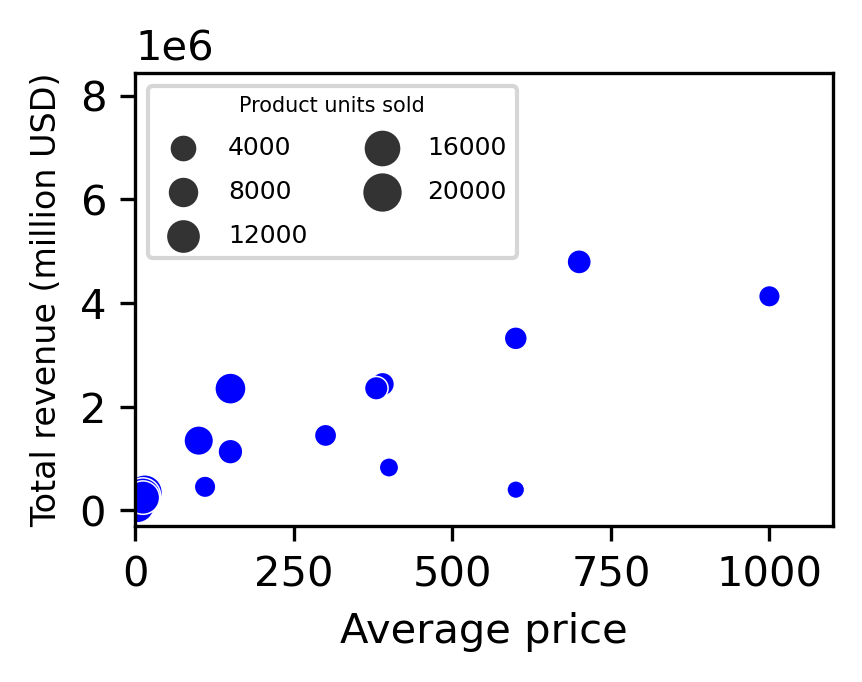

In [67]:
plt.figure(figsize = (3,2), dpi = 300)

sns.scatterplot(data = products, x = "Average price", y = "Total revenue", size = "Total number", color = "blue")
plt.legend(loc = "upper left", fontsize = "xx-small")
plt.ylabel("Total revenue (million USD)", fontsize = 8)
plt.legend(fontsize = 6, title = "Product units sold", title_fontsize = 5, labelspacing = 0.8, ncol = 2, loc = "upper left", fancybox = True)
plt.xlim([0,1100])
plt.show()

- We can see that the most popular products among customers were the cheapest ones. We can find those products by filtering the products dataframe:

In [18]:
avg_price = 250
total_revenue = 4000000

most_popular = products.loc[(products["Average price"] < avg_price) & (products["Total revenue"] < total_revenue)]

most_popular = most_popular.sort_values(by = "Total number", ascending = False)

print(most_popular.to_string())

                            Total number  Average price  Total revenue
USB-C Charging Cable               21903          11.95      286501.25
Lightning Charging Cable           21658          14.95      347094.15
AAA Batteries (4-pack)             20641           2.99       92740.83
AA Batteries (4-pack)              20577           3.84      106118.40
Wired Headphones                   18882          11.99      246478.43
Apple Airpods Headphones           15549         150.00     2349150.00
Bose SoundSport Headphones         13325          99.99     1345565.43
27in FHD Monitor                    7507         149.99     1132424.50
20in Monitor                        4101         109.99      454148.71


## Task 4: Which product generated the most revenue?

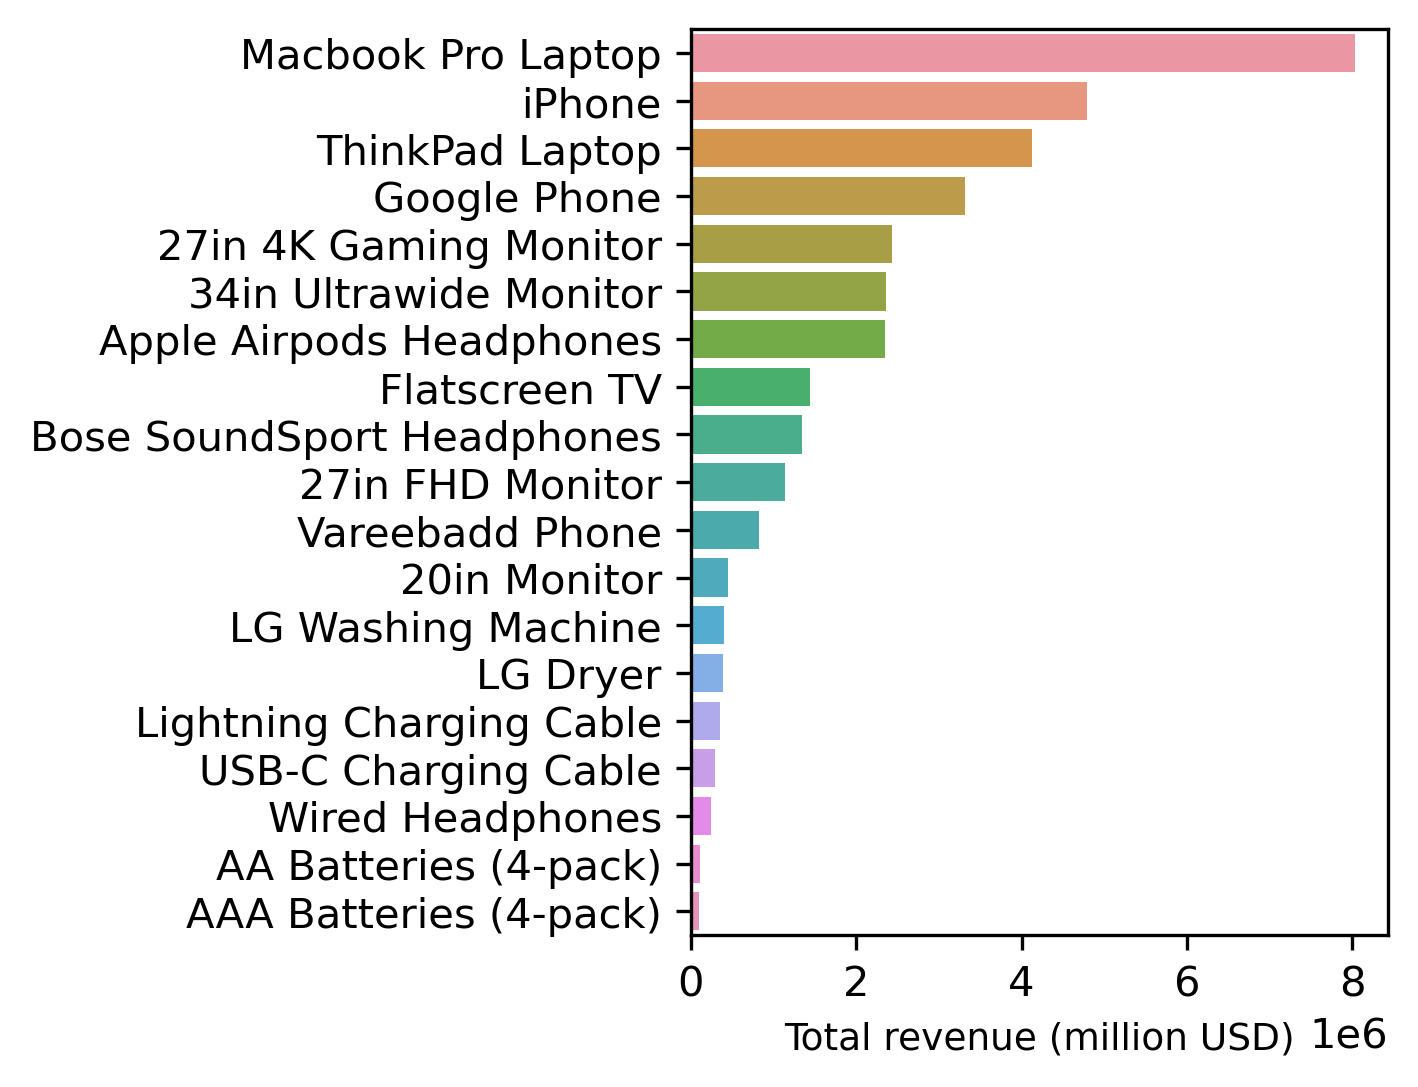

In [69]:
products["Product"] = products.index

plt.figure(figsize = (3,4), dpi = 300)

sns.barplot(data = products.sort_values(by = "Total revenue", ascending = False), y= "Product", x = "Total revenue")
plt.xlabel("Total revenue (million USD)", fontsize = 9)
plt.ylabel("")
plt.show()

## Task 5: Which products were sold the most?

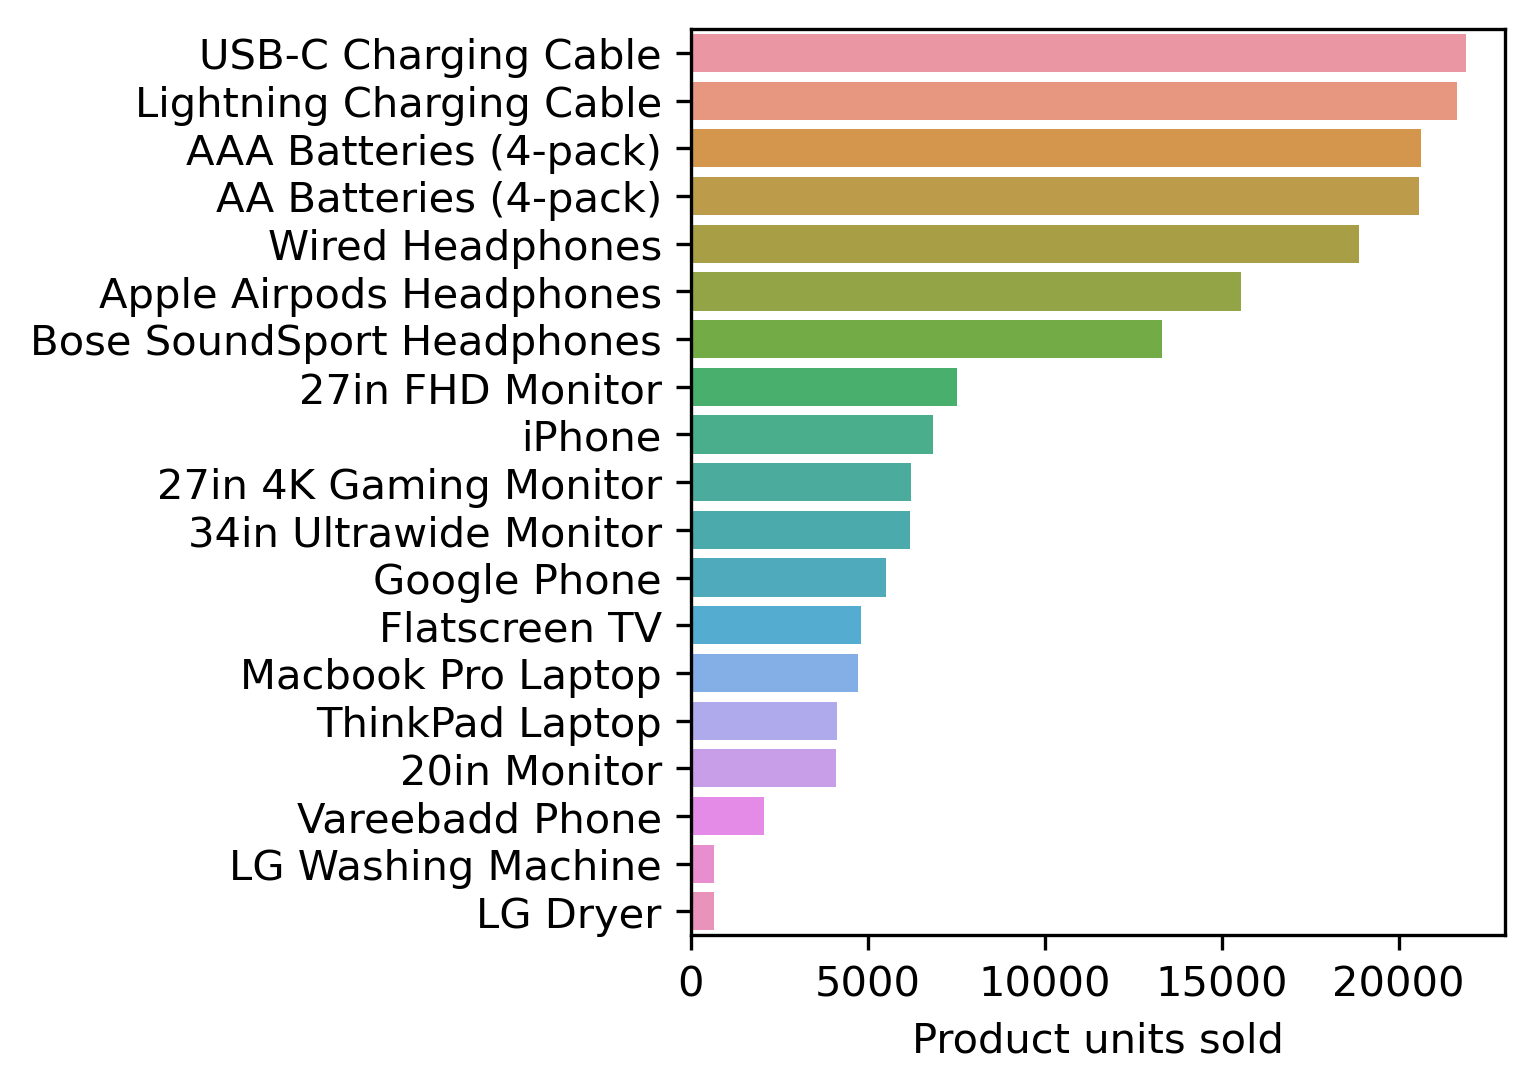

In [70]:
plt.figure(figsize = (3.5,4), dpi = 300)

sns.barplot(data = products.sort_values(by = "Total number", ascending = False), y = "Product", x = "Total number")
plt.xlabel("Product units sold")
plt.ylabel("")
plt.show()

#### ...or it can simply be done with sns.countplot()

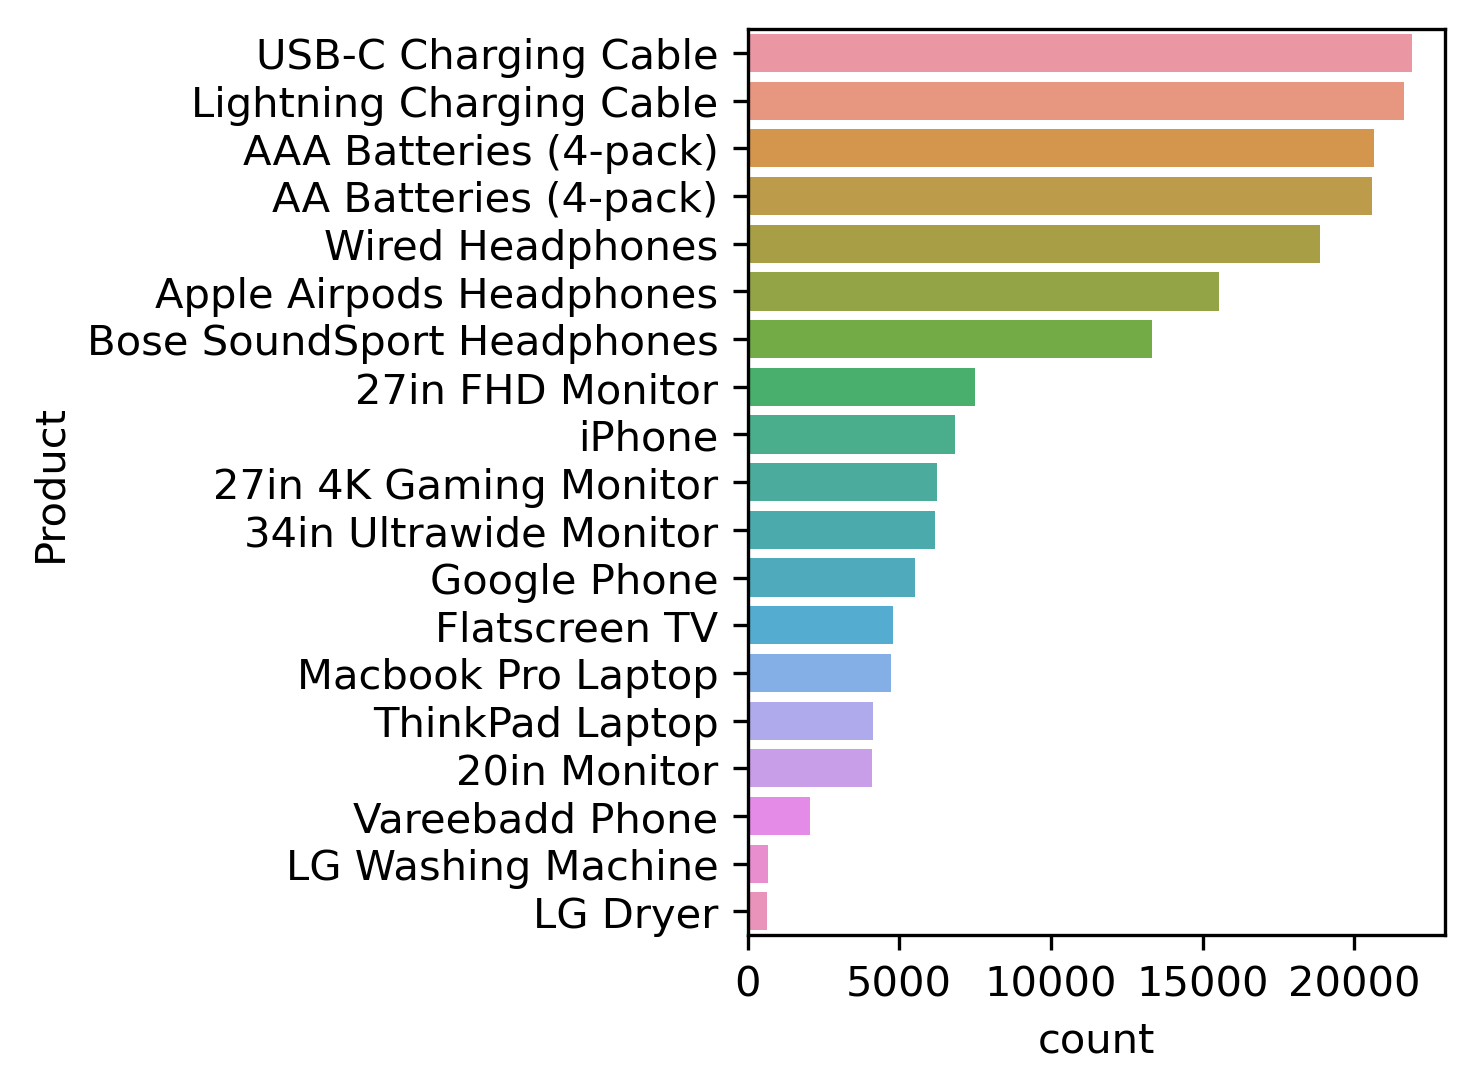

In [21]:
plt.figure(figsize = (3,4), dpi = 300)

sns.countplot(data = df, y = "Product", order = df["Product"].value_counts().index)
plt.show()

## Task 6: What was the best month for sales?

We need to create a variable called **Month** from the Order Date column, then perform the aggregations:

In [22]:
#convert variable to date time for easier handling

df["Order Date"] = pd.to_datetime(df["Order Date"])

#create new variable "Month"

df["Month"] = df["Order Date"].dt.month

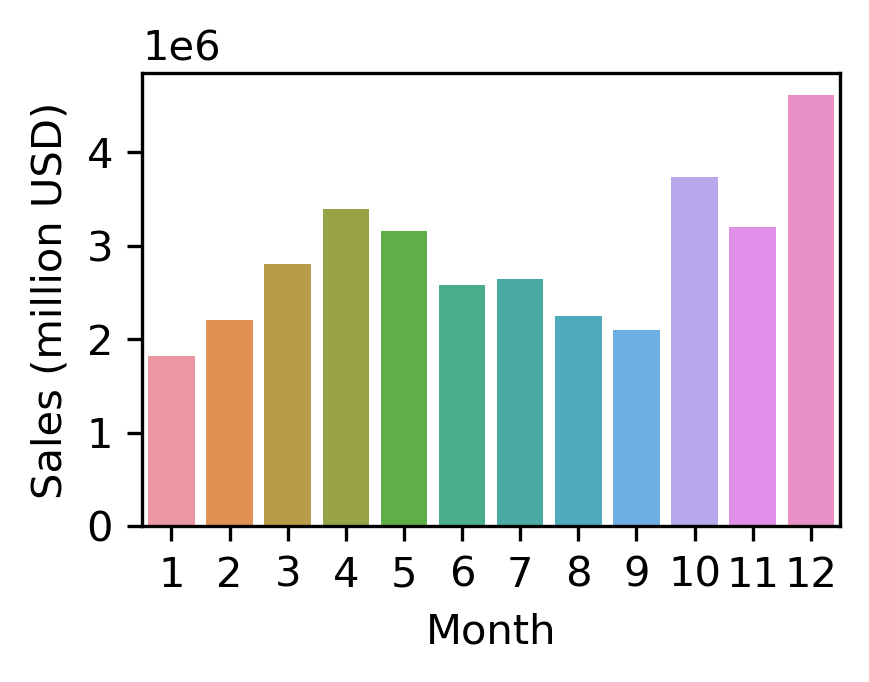

In [23]:
#get results

month = [month for month, df in df.groupby("Month")]

sales = df.groupby("Month").sum()["Sales"]

month_df = pd.DataFrame(data = {"Month": month, "Sales": sales})


plt.figure(figsize = (3,2), dpi = 300)

sns.barplot(data = month_df, x = "Month", y = "Sales")
plt.ylabel("Sales (million USD)")
plt.show()

## Task 7: Find out the city with highest number of sales

In [24]:
#the following function takes the city and the state from the purchase address

def get_city_state(address):
    city = address.split(",")[1]
    state = address.split(",")[2].split(" ")[1]
    return city + " (" + state + ")"

df["City"] = df["Purchase Address"].apply(lambda x: get_city_state(x))

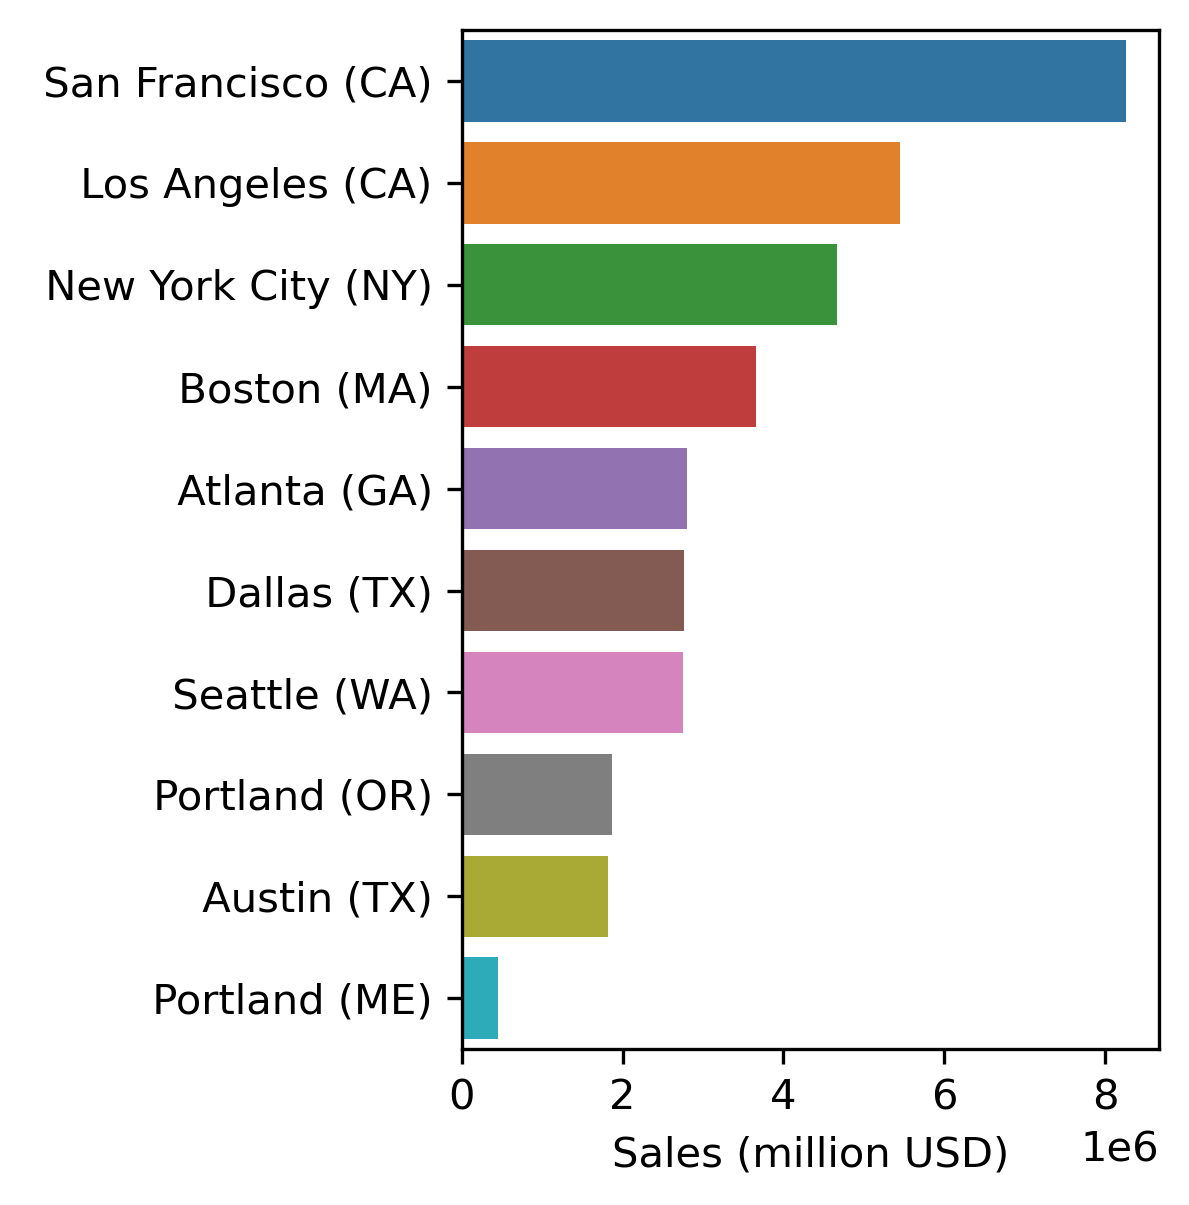

In [25]:
city = [city for city,df in df.groupby("City")]

sales = df.groupby("City").sum()["Sales"].values

city_df = pd.DataFrame(data = {"City": city, "Sales": sales})

plt.figure(figsize = (3,4.5), dpi = 300)

sns.barplot(data = city_df.sort_values(by = "Sales", ascending = False), x = "Sales", y = "City")
plt.ylabel("")
plt.xlabel("Sales (million USD)")

plt.show()

## Task 7: At which hour do we get the highest number of transactions?

Create the variable **Hour** from the Order Date column:

In [26]:
df["Hour"] = df["Order Date"].dt.hour  #add new variable "Hour"

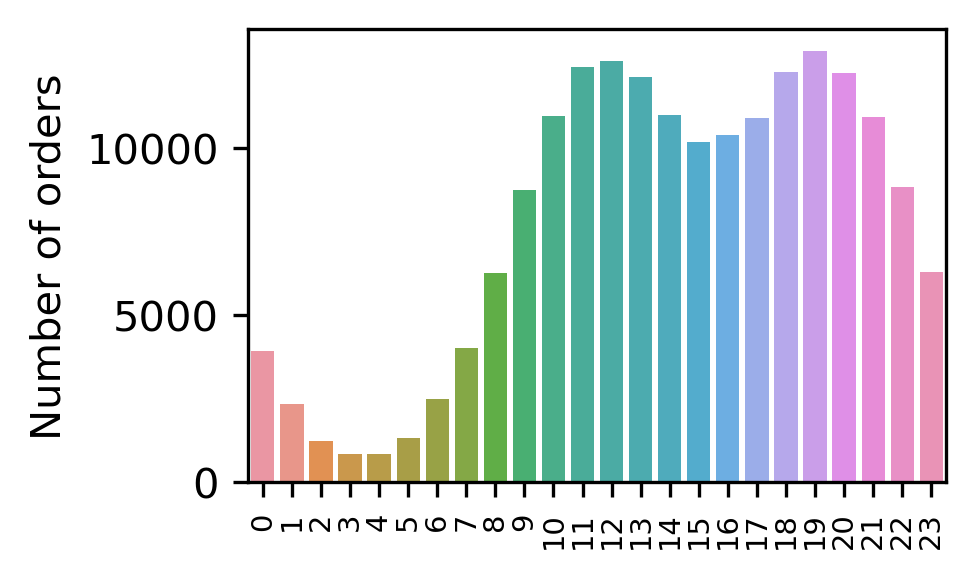

In [29]:
hours = [hour for hour,df in df.groupby("Hour")]

total_orders = df.groupby("Hour").count()["Order ID"].values

order_df = pd.DataFrame(data = {"Hour": hours, "Number of transactions": total_orders})

plt.figure(figsize = (3,2), dpi = 300)


sns.barplot(data = order_df.sort_values(by = "Number of transactions", ascending = False), y = "Number of transactions", x = "Hour")
plt.xticks(rotation = 90, fontsize = "x-small")
plt.ylabel("Number of orders")
plt.xlabel("")
plt.show()

- Orders achieve a peak at around noon (11-12) and another one in the early evening (19-18). It may seem appropiate to use adds in these time frames since more customers are buying more products.